# Finance and Risk Analytics Capstone Project

In [1]:
# importing libraries

import pandas as pd
import numpy as np

import datetime
import re
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading all the csv files

sp_500=pd.read_csv("S&P500.csv")

av_aal=pd.read_csv("Aviation\\AAL.csv")
av_algt=pd.read_csv("Aviation\\ALGT.csv")
av_alk=pd.read_csv("Aviation\\ALK.csv")
av_dal=pd.read_csv("Aviation\\DAL.csv")
av_ha=pd.read_csv("Aviation\\HA.csv")
av_luv=pd.read_csv("Aviation\\LUV.csv")

fin_bcs=pd.read_csv("Finance\\BCS.csv")
fin_cs=pd.read_csv("Finance\\CS.csv")
fin_db=pd.read_csv("Finance\\DB.csv")
fin_gs=pd.read_csv("Finance\\GS.csv")
fin_ms=pd.read_csv("Finance\\MS.csv")
fin_wfc=pd.read_csv("Finance\\WFC.csv")

ph_bhc=pd.read_csv("Pharma_Healthcare\\BHC.csv")
ph_jnj=pd.read_csv("Pharma_Healthcare\\JNJ.csv")
ph_mrk=pd.read_csv("Pharma_Healthcare\\MRK.csv")
ph_pfe=pd.read_csv("Pharma_Healthcare\\PFE.csv")
ph_rhhby=pd.read_csv("Pharma_Healthcare\\RHHBY.csv")
ph_unh=pd.read_csv("Pharma_Healthcare\\UNH.csv")

tech_aapl=pd.read_csv("Technology\\AAPL.csv")
tech_amzn=pd.read_csv("Technology\\AMZN.csv")
tech_FB=pd.read_csv("Technology\\FB.csv")
tech_goog=pd.read_csv("Technology\\GOOG.csv")
tech_ibm=pd.read_csv("Technology\\IBM.csv")
tech_msft=pd.read_csv("Technology\\MSFT.csv")

## Data Preprocessing

In [3]:
# Assigning date type data type to date column

sp_500['Date']=pd.to_datetime(sp_500['Date'],dayfirst=True)

av_aal['Date']=pd.to_datetime(av_aal['Date'],dayfirst=True)
av_algt['Date']=pd.to_datetime(av_algt['Date'],dayfirst=True)
av_alk['Date']=pd.to_datetime(av_alk['Date'],dayfirst=True)
av_dal['Date']=pd.to_datetime(av_dal['Date'],dayfirst=True)
av_ha['Date']=pd.to_datetime(av_ha['Date'],dayfirst=True)
av_luv['Date']=pd.to_datetime(av_luv['Date'],dayfirst=True)

fin_bcs['Date']=pd.to_datetime(fin_bcs['Date'],dayfirst=True)
fin_cs['Date']=pd.to_datetime(fin_cs['Date'],dayfirst=True)
fin_db['Date']=pd.to_datetime(fin_db['Date'],dayfirst=True)
fin_gs['Date']=pd.to_datetime(fin_gs['Date'],dayfirst=True)
fin_ms['Date']=pd.to_datetime(fin_ms['Date'],dayfirst=True)
fin_wfc['Date']=pd.to_datetime(fin_wfc['Date'],dayfirst=True)

ph_bhc['Date']=pd.to_datetime(ph_bhc['Date'],dayfirst=True)
ph_jnj['Date']=pd.to_datetime(ph_jnj['Date'],dayfirst=True)
ph_mrk['Date']=pd.to_datetime(ph_mrk['Date'],dayfirst=True)
ph_pfe['Date']=pd.to_datetime(ph_pfe['Date'],dayfirst=True)
ph_rhhby['Date']=pd.to_datetime(ph_rhhby['Date'],dayfirst=True)
ph_unh['Date']=pd.to_datetime(ph_unh['Date'],dayfirst=True)

tech_aapl['Date']=pd.to_datetime(tech_aapl['Date'],dayfirst=True)
tech_amzn['Date']=pd.to_datetime(tech_amzn['Date'],dayfirst=True)
tech_FB['Date']=pd.to_datetime(tech_FB['Date'],dayfirst=True)
tech_goog['Date']=pd.to_datetime(tech_goog['Date'],dayfirst=True)
tech_ibm['Date']=pd.to_datetime(tech_ibm['Date'],dayfirst=True)
tech_msft['Date']=pd.to_datetime(tech_msft['Date'],dayfirst=True)

In [4]:
# Keeping only the relevent columns of every data set which is closing and opening price of all the stocks

sp_500=sp_500[['Date','Close']]

av_aal=av_aal[['Date','Close']]
av_algt=av_algt[['Date','Close']]
av_alk=av_alk[['Date','Close']]
av_dal=av_dal[['Date','Close']]
av_ha=av_ha[['Date','Close']]
av_luv=av_luv[['Date','Close']]

fin_bcs=fin_bcs[['Date','Close']]
fin_cs=fin_cs[['Date','Close']]
fin_db=fin_db[['Date','Close']]
fin_gs=fin_gs[['Date','Close']]
fin_ms=fin_ms[['Date','Close']]
fin_wfc=fin_wfc[['Date','Close']]

ph_bhc=ph_bhc[['Date','Close']]
ph_jnj=ph_jnj[['Date','Close']]
ph_mrk=ph_mrk[['Date','Close']]
ph_pfe=ph_pfe[['Date','Close']]
ph_rhhby=ph_rhhby[['Date','Close']]
ph_unh=ph_unh[['Date','Close']]

tech_aapl=tech_aapl[['Date','Close']]
tech_amzn=tech_amzn[['Date','Close']]
tech_FB=tech_FB[['Date','Close']]
tech_goog=tech_goog[['Date','Close']]
tech_ibm=tech_ibm[['Date','Close']]
tech_msft=tech_msft[['Date','Close']]

In [5]:
# Adding prefix to all the columns of data frames

sp_500=sp_500.add_prefix("sp_500_")

av_aal=av_aal.add_prefix("av_aal_")
av_algt=av_algt.add_prefix("av_algt_")
av_alk=av_alk.add_prefix("av_alk_")
av_dal=av_dal.add_prefix("av_dal_")
av_ha=av_ha.add_prefix("av_ha_")
av_luv=av_luv.add_prefix("av_luv_")

fin_bcs=fin_bcs.add_prefix("fin_bcs_")
fin_cs=fin_cs.add_prefix("fin_cs_")
fin_db=fin_db.add_prefix("fin_db_")
fin_gs=fin_gs.add_prefix("fin_gs_")
fin_ms=fin_ms.add_prefix("fin_ms_")
fin_wfc=fin_wfc.add_prefix("fin_wfc_")

ph_bhc=ph_bhc.add_prefix("ph_bhc_")
ph_jnj=ph_jnj.add_prefix("ph_jnj_")
ph_mrk=ph_mrk.add_prefix("ph_mrk_")
ph_pfe=ph_pfe.add_prefix("ph_pfe_")
ph_rhhby=ph_rhhby.add_prefix("ph_rhhby_")
ph_unh=ph_unh.add_prefix("ph_unh_")

tech_aapl=tech_aapl.add_prefix("tech_aapl_")
tech_amzn=tech_amzn.add_prefix("tech_amzn_")
tech_FB=tech_FB.add_prefix("tech_FB_")
tech_goog=tech_goog.add_prefix("tech_goog_")
tech_ibm=tech_ibm.add_prefix("tech_ibm_")
tech_msft=tech_msft.add_prefix("tech_msft_")

In [6]:
# Merging all the files

data=pd.merge(left=sp_500,right=av_aal,left_on='sp_500_Date',right_on='av_aal_Date',how='inner')
data=pd.merge(left=data,right=av_algt,left_on='sp_500_Date',right_on='av_algt_Date',how='inner')
data=pd.merge(left=data,right=av_alk,left_on='sp_500_Date',right_on='av_alk_Date',how='inner')
data=pd.merge(left=data,right=av_dal,left_on='sp_500_Date',right_on='av_dal_Date',how='inner')
data=pd.merge(left=data,right=av_ha,left_on='sp_500_Date',right_on='av_ha_Date',how='inner')
data=pd.merge(left=data,right=av_luv,left_on='sp_500_Date',right_on='av_luv_Date',how='inner')

data=pd.merge(left=data,right=fin_bcs,left_on='sp_500_Date',right_on='fin_bcs_Date',how='inner')
data=pd.merge(left=data,right=fin_cs,left_on='sp_500_Date',right_on='fin_cs_Date',how='inner')
data=pd.merge(left=data,right=fin_db,left_on='sp_500_Date',right_on='fin_db_Date',how='inner')
data=pd.merge(left=data,right=fin_gs,left_on='sp_500_Date',right_on='fin_gs_Date',how='inner')
data=pd.merge(left=data,right=fin_ms,left_on='sp_500_Date',right_on='fin_ms_Date',how='inner')
data=pd.merge(left=data,right=fin_wfc,left_on='sp_500_Date',right_on='fin_wfc_Date',how='inner')

data=pd.merge(left=data,right=ph_bhc,left_on='sp_500_Date',right_on='ph_bhc_Date',how='inner')
data=pd.merge(left=data,right=ph_jnj,left_on='sp_500_Date',right_on='ph_jnj_Date',how='inner')
data=pd.merge(left=data,right=ph_mrk,left_on='sp_500_Date',right_on='ph_mrk_Date',how='inner')
data=pd.merge(left=data,right=ph_pfe,left_on='sp_500_Date',right_on='ph_pfe_Date',how='inner')
data=pd.merge(left=data,right=ph_rhhby,left_on='sp_500_Date',right_on='ph_rhhby_Date',how='inner')
data=pd.merge(left=data,right=ph_unh,left_on='sp_500_Date',right_on='ph_unh_Date',how='inner')

data=pd.merge(left=data,right=tech_aapl,left_on='sp_500_Date',right_on='tech_aapl_Date',how='inner')
data=pd.merge(left=data,right=tech_amzn,left_on='sp_500_Date',right_on='tech_amzn_Date',how='inner')
data=pd.merge(left=data,right=tech_FB,left_on='sp_500_Date',right_on='tech_FB_Date',how='inner')
data=pd.merge(left=data,right=tech_goog,left_on='sp_500_Date',right_on='tech_goog_Date',how='inner')
data=pd.merge(left=data,right=tech_ibm,left_on='sp_500_Date',right_on='tech_ibm_Date',how='inner')
data=pd.merge(left=data,right=tech_msft,left_on='sp_500_Date',right_on='tech_msft_Date',how='inner')

In [7]:
# Dropping all the irrelevent date columns

data=data.drop(['av_aal_Date','av_algt_Date','av_alk_Date','av_dal_Date','av_ha_Date','av_luv_Date','fin_bcs_Date',
                'fin_cs_Date','fin_db_Date','fin_gs_Date','fin_ms_Date','fin_wfc_Date','ph_bhc_Date','ph_jnj_Date',
               'ph_mrk_Date','ph_pfe_Date','ph_rhhby_Date','ph_unh_Date','tech_aapl_Date','tech_amzn_Date',
               'tech_FB_Date','tech_goog_Date','tech_ibm_Date','tech_msft_Date'],axis=1)

In [8]:
# Renaming the data column

data.rename(columns={'sp_500_Date':'Date'},inplace=True)

In [9]:
# Checking for null values

data.isna().sum()

Date               0
sp_500_Close       0
av_aal_Close       0
av_algt_Close      0
av_alk_Close       0
av_dal_Close       0
av_ha_Close        0
av_luv_Close       0
fin_bcs_Close      0
fin_cs_Close       0
fin_db_Close       0
fin_gs_Close       0
fin_ms_Close       0
fin_wfc_Close      0
ph_bhc_Close       0
ph_jnj_Close       0
ph_mrk_Close       0
ph_pfe_Close       0
ph_rhhby_Close     0
ph_unh_Close       0
tech_aapl_Close    0
tech_amzn_Close    0
tech_FB_Close      0
tech_goog_Close    0
tech_ibm_Close     0
tech_msft_Close    0
dtype: int64

Inferences-

- There are no null values after merging all the data sets

In [10]:
# Taking the Data of last 5 years only, since analysis is need to be done on that only

data=data[(data['Date']>='2015-10-01') & (data['Date']<='2020-09-30')]

In [11]:
# Setting date column as index

data=data.set_index('Date')

In [12]:
data.head()

,sp_500_Close,av_aal_Close,av_algt_Close,av_alk_Close,av_dal_Close,av_ha_Close,av_luv_Close,fin_bcs_Close,fin_cs_Close,fin_db_Close,...,ph_mrk_Close,ph_pfe_Close,ph_rhhby_Close,ph_unh_Close,tech_aapl_Close,tech_amzn_Close,tech_FB_Close,tech_goog_Close,tech_ibm_Close,tech_msft_Close
Date,,,,,,,,,,,,,,,,,,,,,
2015-10-01,1923.819946,39.200001,217.979996,80.230003,45.410000,24.730000,38.410000,15.01,24.090000,26.520000,...,49.369999,31.840000,33.220001,116.610001,27.395000,520.719971,90.949997,611.289978,143.589996,44.610001
2015-10-02,1951.359985,38.630001,215.589996,79.260002,44.869999,24.280001,38.380001,15.39,24.639999,27.139999,...,50.139999,33.080002,33.320000,118.830002,27.594999,532.539978,92.070000,626.909973,144.580002,45.570000
2015-10-05,1987.050049,40.189999,216.059998,80.910004,46.959999,25.500000,39.299999,15.60,25.160000,28.200001,...,51.230000,33.480000,33.439999,119.650002,27.695000,543.679993,94.010002,641.469971,149.039993,46.630001
2015-10-06,1979.920044,38.130001,208.600006,74.529999,45.090000,24.250000,38.000000,15.55,25.379999,28.400000,...,49.799999,32.790001,33.529999,116.050003,27.827499,537.479980,92.800003,645.440002,148.779999,46.750000
2015-10-07,1995.829956,39.310001,213.839996,75.970001,45.990002,24.559999,38.709999,15.73,25.320000,28.790001,...,50.950001,33.290001,32.549999,116.430000,27.695000,541.940002,92.400002,642.359985,150.089996,46.799999


In [61]:
# Exporting final dataset the will be used for the analysis

# data.to_excel('FInal_Dataset.xlsx')

## Data Exploration

### Visualisations

#### Graphical display of closing price trends over the years for every stock

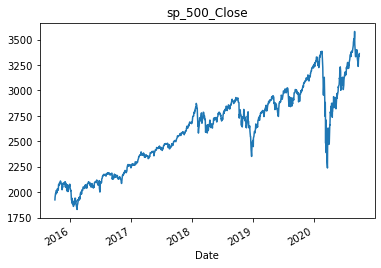

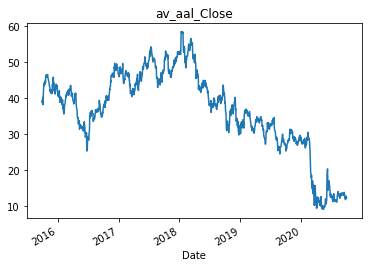

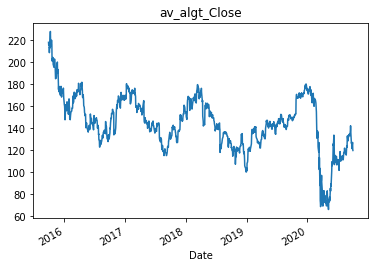

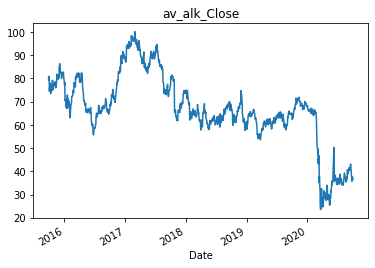

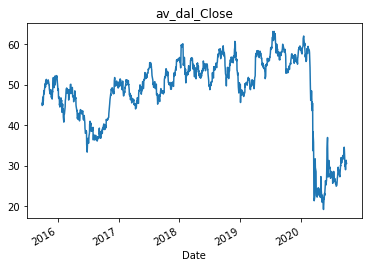

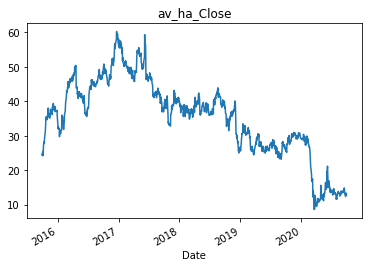

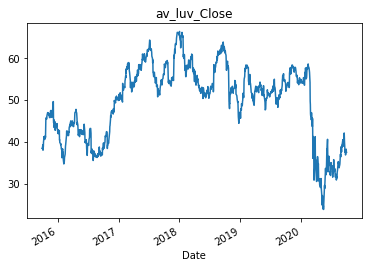

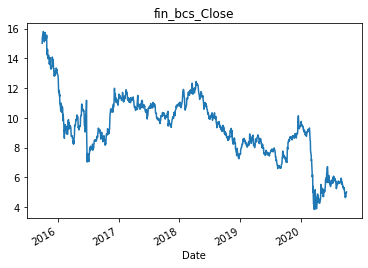

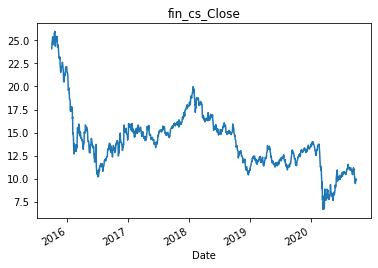

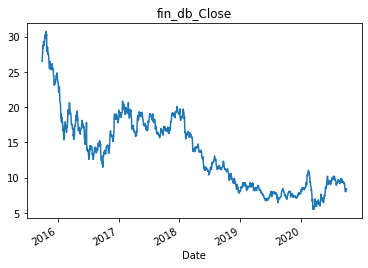

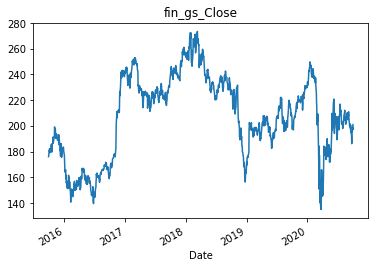

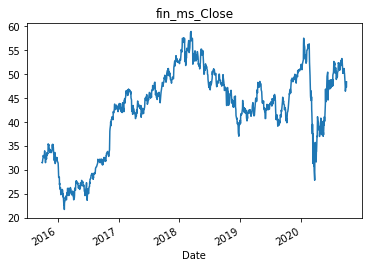

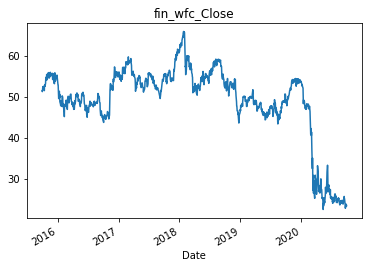

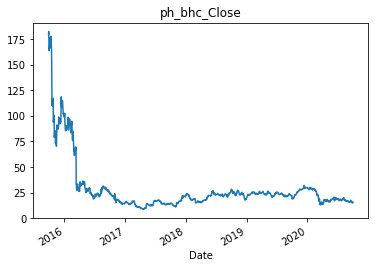

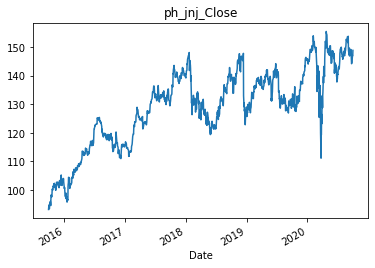

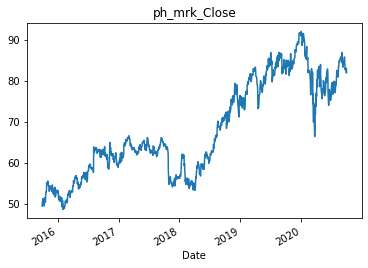

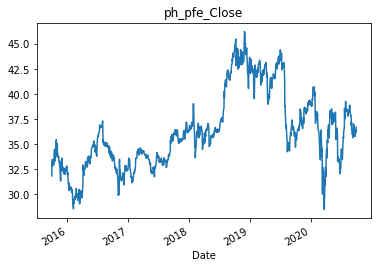

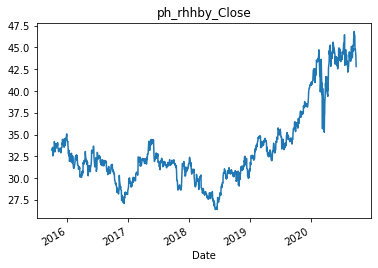

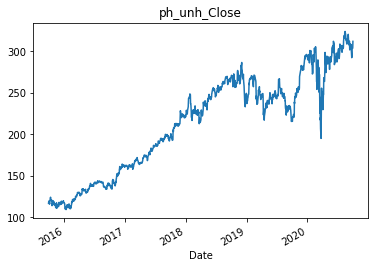

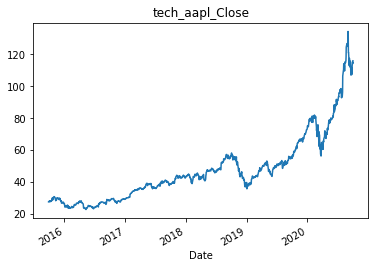

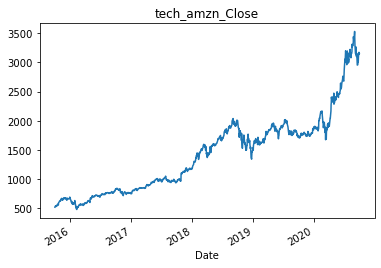

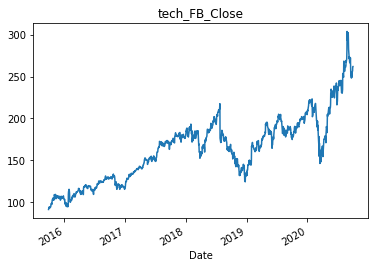

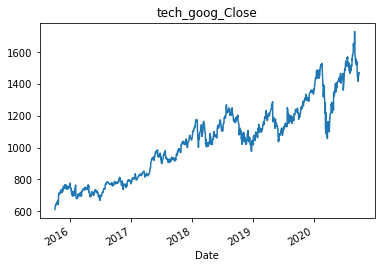

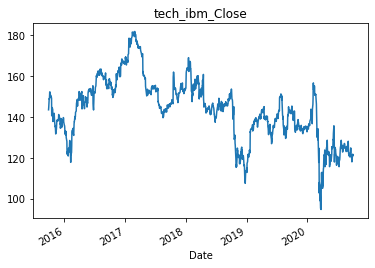

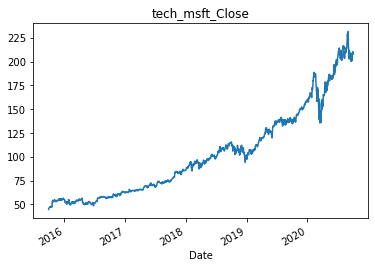

In [62]:
# Graphical representation of closing price of every stock

for i in data.columns:
    plt.figure()
    plt.title(i)
    data[i].plot()

#### Calculating Data frame of Normalized Closing Stock Prices

In [15]:
# Function to calculate normalized stock price 

def normalize_data(df):
    # df on input should contain only one column with the price data (plus dataframe index)
    min = df.min()
    max = df.max()
    x = df 
    
    # time series normalization part
    # y will be a column in a dataframe
    y = (x - min) / (max - min)
    
    return y

In [16]:
# Creatin Data Frame with normalised closing price

data_norm=pd.DataFrame()
for i in data.columns:
    data_norm[i]=normalize_data(data[i])

#### Graphical display of Mormalized closing price trends over the years for every stock

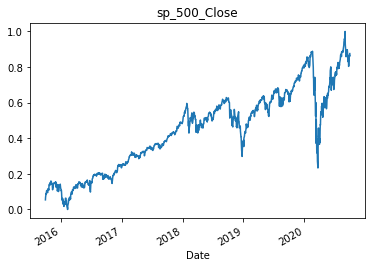

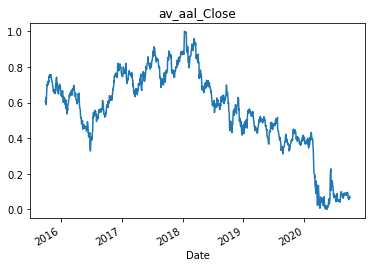

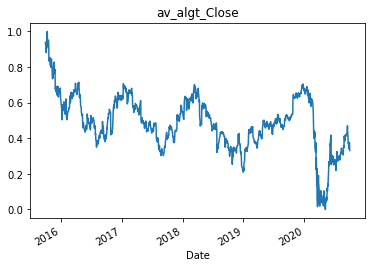

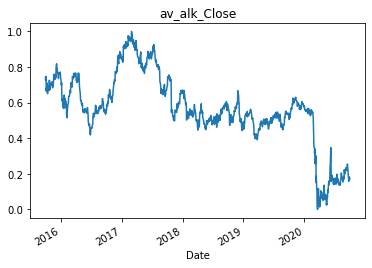

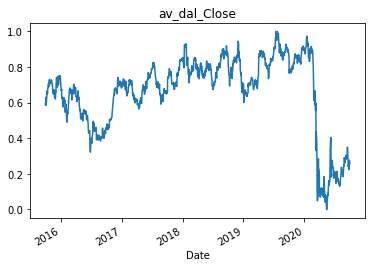

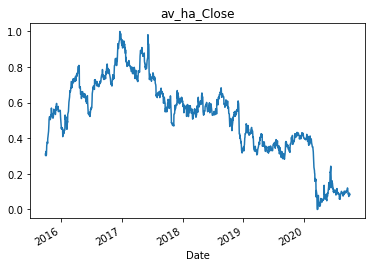

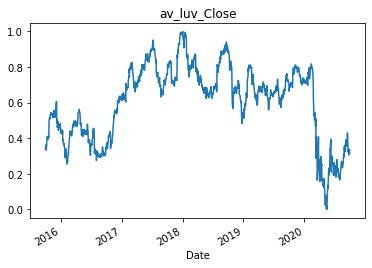

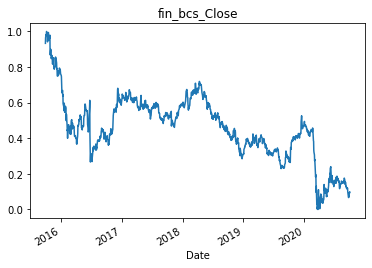

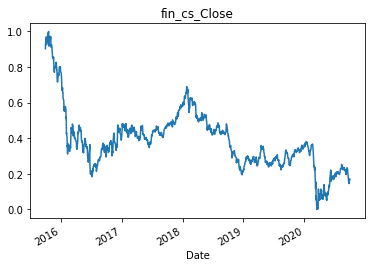

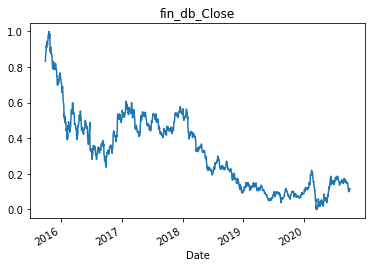

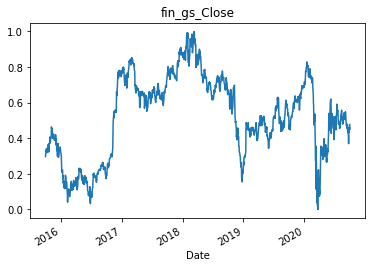

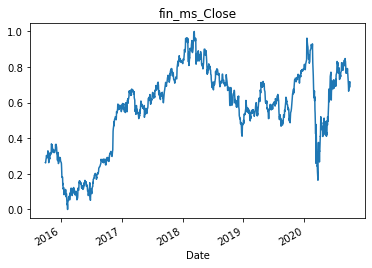

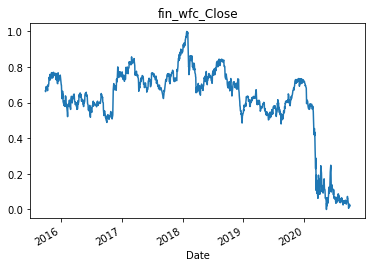

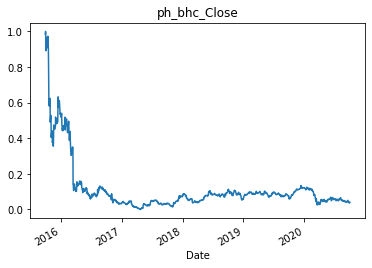

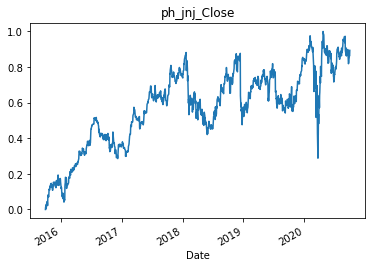

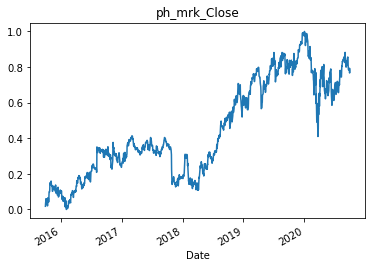

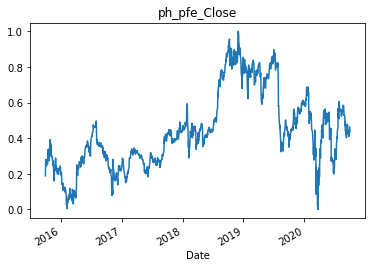

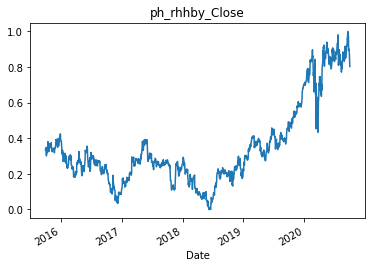

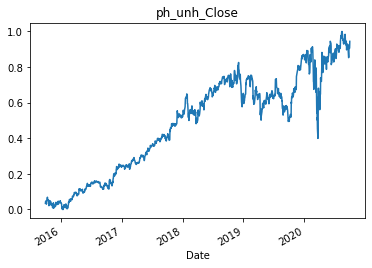

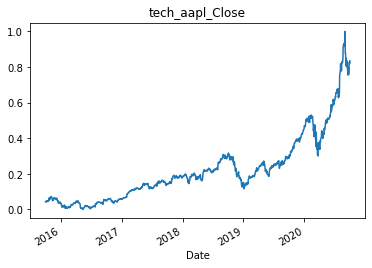

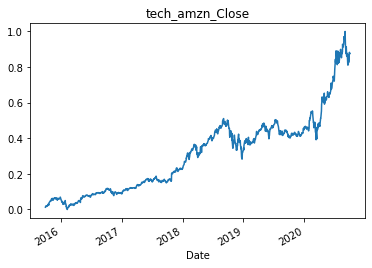

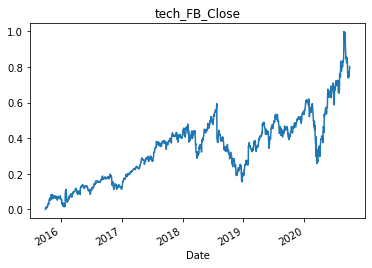

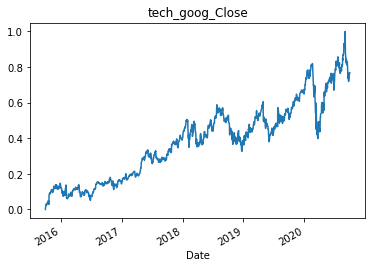

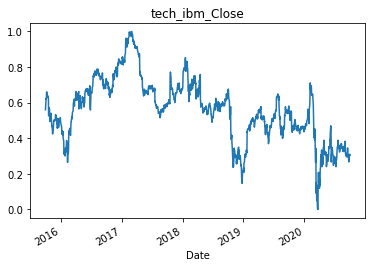

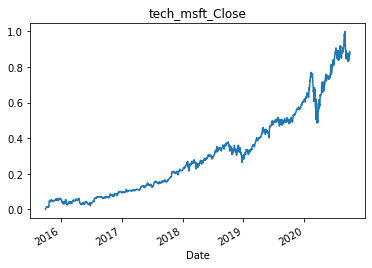

In [63]:
# Graphical representation of normalized closing price of every stock

for i in data_norm.columns:
    plt.figure()
    plt.title(i)
    data_norm[i].plot()

In [18]:
# Creating 4 normalized closing price dataframes for each industry 

data_norm_aviation=data_norm[[ 'av_aal_Close', 'av_algt_Close', 'av_alk_Close','av_dal_Close', 
                              'av_ha_Close', 'av_luv_Close']]
data_norm_finance=data_norm[['fin_bcs_Close','fin_cs_Close', 'fin_db_Close', 'fin_gs_Close', 
                             'fin_ms_Close','fin_wfc_Close']]
data_norm_pharma=data_norm[['ph_bhc_Close', 'ph_jnj_Close', 'ph_mrk_Close','ph_pfe_Close', 
                            'ph_rhhby_Close', 'ph_unh_Close']]
data_norm_technology=data_norm[['tech_aapl_Close','tech_amzn_Close', 'tech_FB_Close', 
                                'tech_goog_Close', 'tech_ibm_Close', 'tech_msft_Close']]

In [19]:
# Calculating mean of all the stocks of every industry

data_norm_aviation['mean']=(data_norm_aviation['av_aal_Close']+data_norm_aviation['av_algt_Close']+
                            data_norm_aviation['av_alk_Close']+data_norm_aviation['av_dal_Close']+
                            data_norm_aviation['av_ha_Close']+data_norm_aviation['av_luv_Close'])/6

data_norm_finance['mean']=(data_norm_finance['fin_bcs_Close']+data_norm_finance['fin_cs_Close']+
                            data_norm_finance['fin_db_Close']+data_norm_finance['fin_gs_Close']+
                            data_norm_finance['fin_ms_Close']+data_norm_finance['fin_wfc_Close'])/6

data_norm_pharma['mean']=(data_norm_pharma['ph_bhc_Close']+data_norm_pharma['ph_jnj_Close']+
                            data_norm_pharma['ph_mrk_Close']+data_norm_pharma['ph_pfe_Close']+
                            data_norm_pharma['ph_rhhby_Close']+data_norm_pharma['ph_unh_Close'])/6

data_norm_technology['mean']=(data_norm_technology['tech_aapl_Close']+data_norm_technology['tech_amzn_Close']+
                            data_norm_technology['tech_FB_Close']+data_norm_technology['tech_goog_Close']+
                            data_norm_technology['tech_ibm_Close']+data_norm_technology['tech_msft_Close'])/6

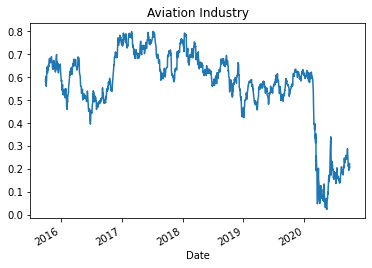

In [64]:
# Plotting normalized price trend of Aviation Industry

plt.title('Aviation Industry')
data_norm_aviation['mean'].plot()


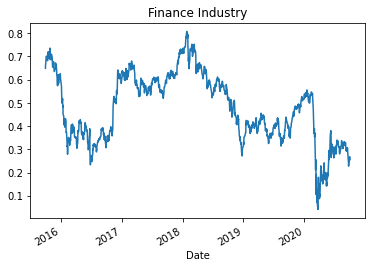

In [65]:
# Plotting normalized price trend of Finance Industry

plt.title('Finance Industry')
data_norm_finance['mean'].plot()


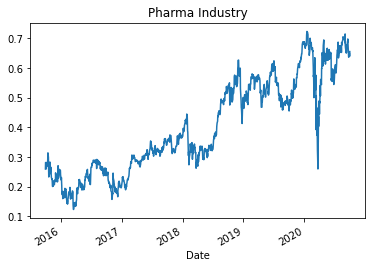

In [66]:
# Plotting normalized price trend of Pharma Industry

plt.title('Pharma Industry')
data_norm_pharma['mean'].plot()


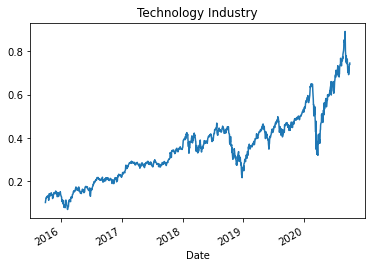

In [67]:
# Plotting normalized price trend of Technology Industry

plt.title('Technology Industry')
data_norm_technology['mean'].plot()


### Calculating Evaluation Matrics

### 1. Calculating daily returns

Daily return is the percentage change in the price of the stock from the previous day. This can be calculated using the percentage change in the price on a daily basis.

In [74]:
# Calculating daily returns of all the stocks

stocks_returns = data.pct_change()

In [75]:
# Average daily return from each stock

daily_returns_mean = stocks_returns.mean()
print(daily_returns_mean)

sp_500_Close       0.000517
av_aal_Close      -0.000336
av_algt_Close     -0.000047
av_alk_Close      -0.000256
av_dal_Close       0.000042
av_ha_Close        0.000034
av_luv_Close       0.000245
fin_bcs_Close     -0.000548
fin_cs_Close      -0.000437
fin_db_Close      -0.000529
fin_gs_Close       0.000303
fin_ms_Close       0.000578
fin_wfc_Close     -0.000414
ph_bhc_Close      -0.000897
ph_jnj_Close       0.000451
ph_mrk_Close       0.000511
ph_pfe_Close       0.000209
ph_rhhby_Close     0.000293
ph_unh_Close       0.000941
tech_aapl_Close    0.001322
tech_amzn_Close    0.001611
tech_FB_Close      0.001050
tech_goog_Close    0.000834
tech_ibm_Close    -0.000002
tech_msft_Close    0.001387
dtype: float64


In [76]:
# Converting it into DataFrame

daily_returns_mean = pd.DataFrame(data=daily_returns_mean, columns=['Avg_Daily_Returns'])

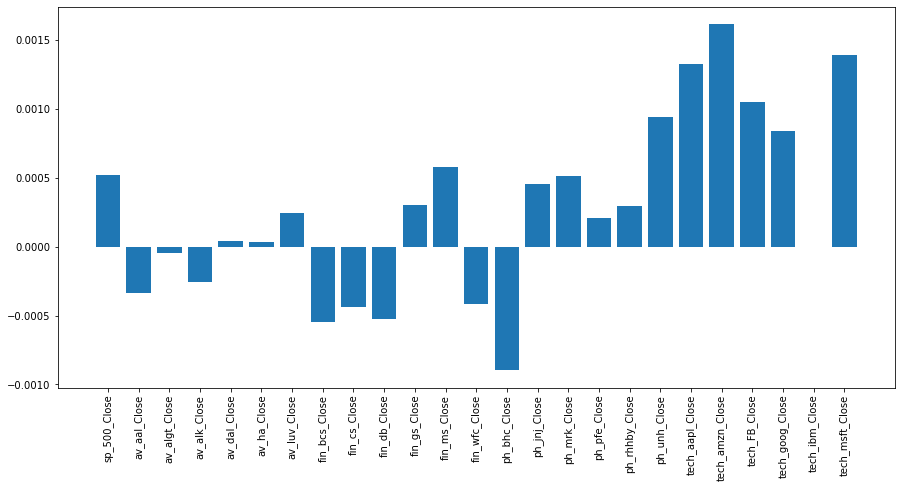

In [78]:
# Plot for Average daily returns of all the stock

plt.figure(figsize=[15,7])
plt.xticks(rotation=90)
plt.bar(data=daily_returns_mean,height='Avg_Daily_Returns',x=daily_returns_mean.index)


In [28]:
# Creating 4 dataframes for every Industry containing daily return values.

daily_returns_aviation=daily_returns_mean[daily_returns_mean.index.isin(['av_aal_Close', 'av_algt_Close', 
                                                                         'av_alk_Close','av_dal_Close', 
                                                                         'av_ha_Close','av_luv_Close'])]
daily_returns_finance=daily_returns_mean[daily_returns_mean.index.isin(['fin_bcs_Close','fin_cs_Close',
                                                                        'fin_db_Close', 'fin_gs_Close', 
                                                                        'fin_ms_Close','fin_wfc_Close'])]
daily_returns_pharma=daily_returns_mean[daily_returns_mean.index.isin(['ph_bhc_Close', 'ph_jnj_Close', 
                                                                       'ph_mrk_Close','ph_pfe_Close', 
                                                                       'ph_rhhby_Close', 'ph_unh_Close']  )  ]
daily_returns_technology=daily_returns_mean[daily_returns_mean.index.isin(['tech_aapl_Close','tech_amzn_Close', 
                                                                           'tech_FB_Close', 'tech_goog_Close', 
                                                                           'tech_ibm_Close', 'tech_msft_Close'] )   ]                             

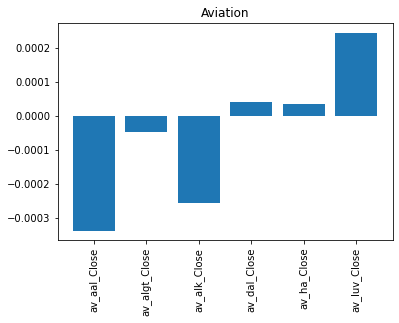

In [79]:
# Plotting Average daily return of Aviation Industry

plt.xticks(rotation=90)
plt.title("Aviation")
plt.bar(data=daily_returns_aviation,height='Avg_Daily_Returns',x=daily_returns_aviation.index)


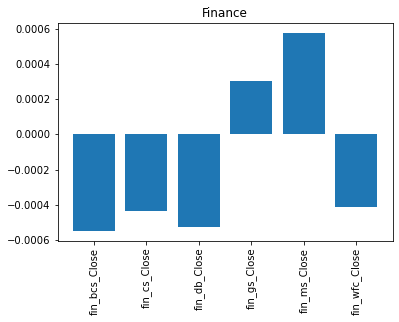

In [80]:
# Plotting Average daily return of Finance Industry

plt.xticks(rotation=90)
plt.title("Finance")
plt.bar(data=daily_returns_finance,height='Avg_Daily_Returns',x=daily_returns_finance.index)


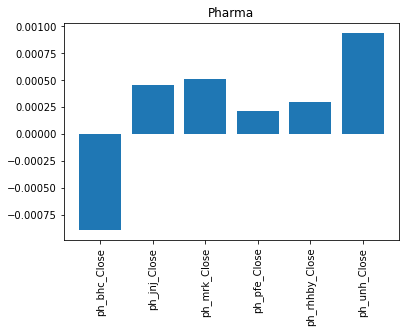

In [81]:
# Plotting Average daily return of Pharma Industry

plt.xticks(rotation=90)
plt.title("Pharma")
plt.bar(data=daily_returns_pharma,height='Avg_Daily_Returns',x=daily_returns_pharma.index)


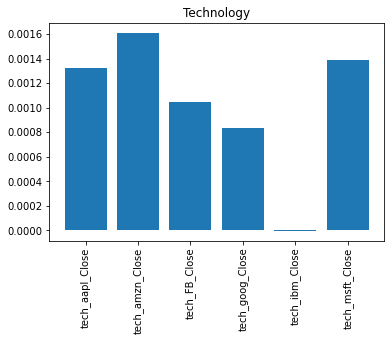

In [82]:
# Plotting Average daily return of Technology Industry

plt.xticks(rotation=90)
plt.title("Technology")
plt.bar(data=daily_returns_technology,height='Avg_Daily_Returns',x=daily_returns_technology.index)


In [33]:
# Creating empty dictionary to store industry wise return

return_industry={'Industry':[],'Return':[]}

In [34]:
# Appending Industry and there respective mean to the dictionary

return_industry['Industry'].append('Aviation')
return_industry['Return'].append(daily_returns_aviation.mean()[0])
return_industry['Industry'].append('Finance')
return_industry['Return'].append(daily_returns_finance.mean()[0])
return_industry['Industry'].append('Pharma')
return_industry['Return'].append(daily_returns_pharma.mean()[0])
return_industry['Industry'].append('Technology')
return_industry['Return'].append(daily_returns_technology.mean()[0])

In [35]:
# Converting dictionary into dataframe

return_industry=pd.DataFrame(return_industry)
return_industry

,Industry,Return
0,Aviation,-0.000053
1,Finance,-0.000175
2,Pharma,0.000251
3,Technology,0.001034


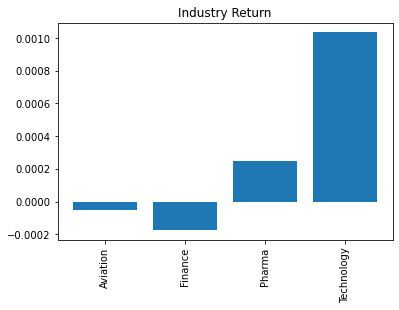

In [83]:
# Plotting indusrty wise return

plt.xticks(rotation=90)
plt.title("Industry Return")
plt.bar(data=return_industry,height='Return',x='Industry')


### 2. Stock price dispersion from mean

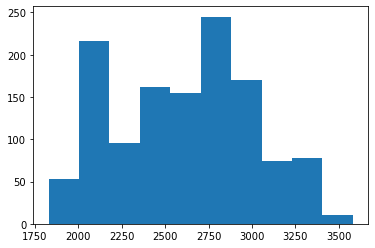

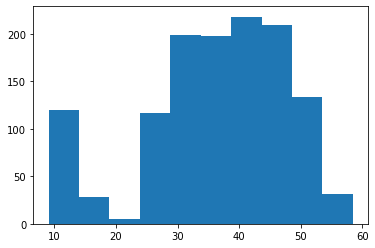

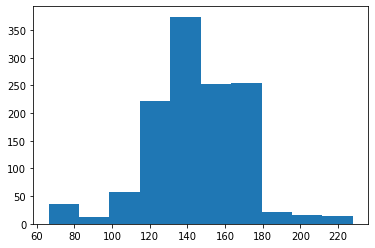

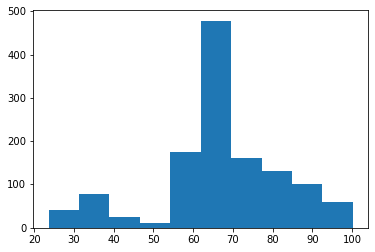

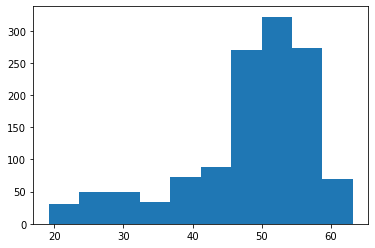

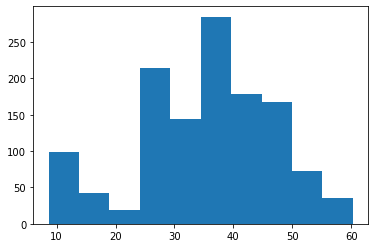

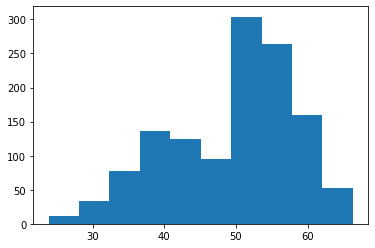

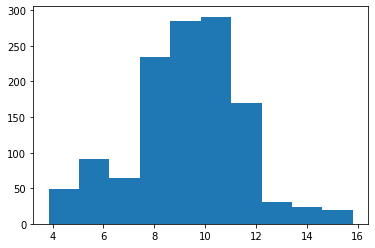

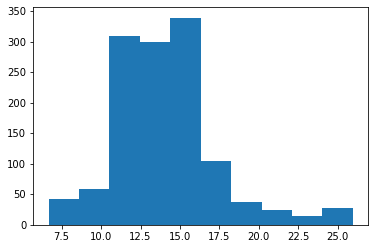

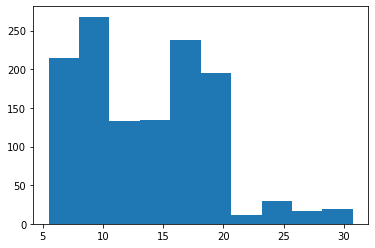

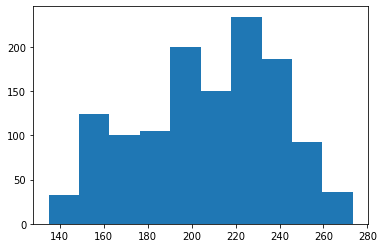

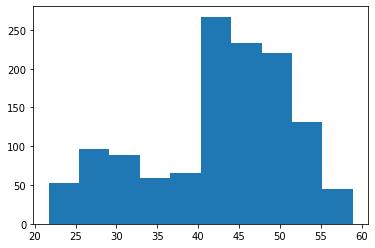

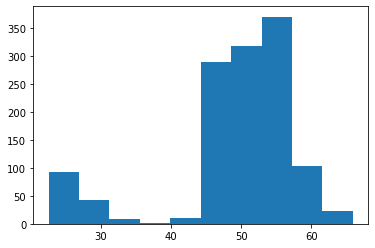

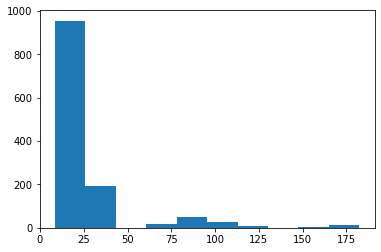

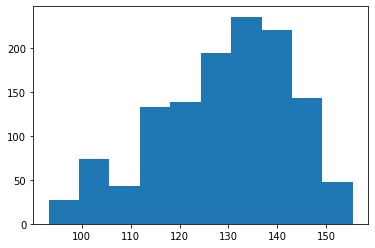

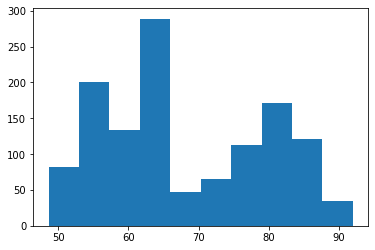

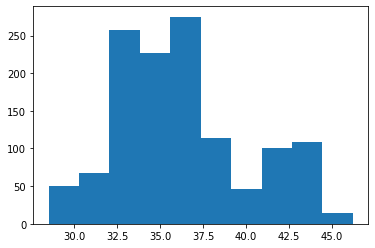

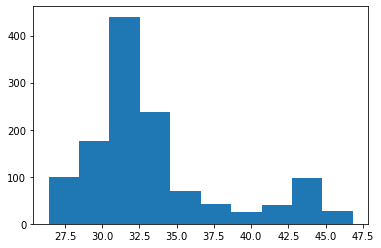

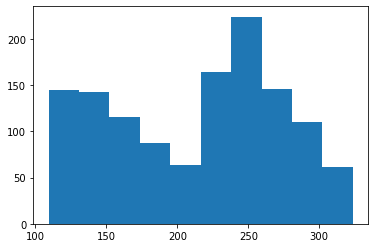

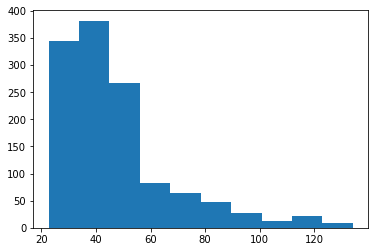

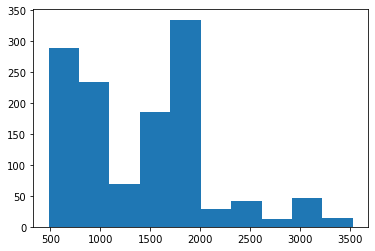

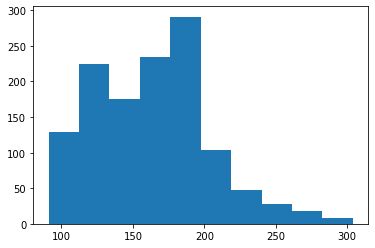

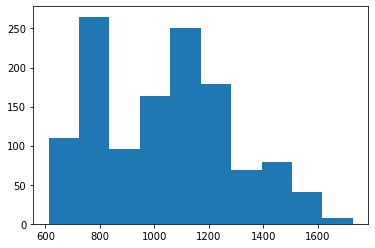

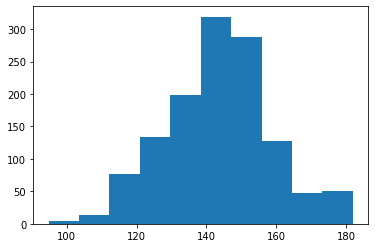

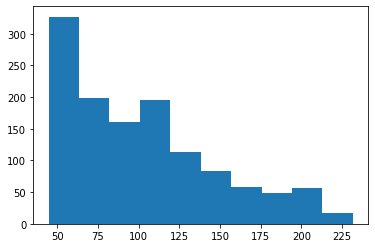

In [84]:
# Histogram for all the stock prices

for i in data.columns:
    plt.figure()
    plt.hist(data=data,x=i)
   

### 3. Calculating maximum and minimum price of 5 years of every stock

In [38]:
# Calculating Maximum and Minimum value of every stock

data_min=data.min()
data_max=data.max()

In [39]:
# Converting it into dataframes

data_min=pd.DataFrame(data_min,columns=['min'])
data_max=pd.DataFrame(data_max,columns=['max'])

In [40]:
# Merging dataframes of maximum and minimum values

data_min_max=pd.merge(left=data_min,right=data_max,left_index=True, right_index=True)
data_min_max

,min,max
sp_500_Close,1829.079956,3580.840088
av_aal_Close,9.040000,58.470001
av_algt_Close,66.230003,227.860001
av_alk_Close,23.559999,100.239998
av_dal_Close,19.190001,63.160000
av_ha_Close,8.630000,60.299999
av_luv_Close,23.870001,66.290001
fin_bcs_Close,3.840000,15.810000
fin_cs_Close,6.670000,25.959999
fin_db_Close,5.480000,30.750000


### 4. Calculatin Risk/Volatility

In [41]:
# Calculating Risk/Volatility as standard deviation of the stocks

data_std = data.std(ddof=0)

In [42]:
# Converting it into dataframe

data_std=pd.DataFrame(data_std,columns=['Risk'])
data_std=data_std.sort_values(by='Risk',ascending=False)
data_std

,Risk
tech_amzn_Close,668.094905
sp_500_Close,394.581280
tech_goog_Close,241.504770
ph_unh_Close,59.405895
tech_msft_Close,45.740242
tech_FB_Close,40.029860
fin_gs_Close,31.586157
ph_bhc_Close,24.984640
av_algt_Close,24.896583
tech_aapl_Close,20.984674


In [43]:
# Creating 4 different dataframes of risk for every Industry

risk_aviation=data_std[data_std.index.isin(['av_aal_Close', 'av_algt_Close','av_alk_Close','av_dal_Close',
                                            'av_ha_Close','av_luv_Close'])]
risk_finance=data_std[data_std.index.isin(['fin_bcs_Close','fin_cs_Close','fin_db_Close', 'fin_gs_Close',
                                           'fin_ms_Close','fin_wfc_Close'])]
risk_pharma=data_std[data_std.index.isin(['ph_bhc_Close', 'ph_jnj_Close','ph_mrk_Close','ph_pfe_Close',
                                          'ph_rhhby_Close', 'ph_unh_Close'])]
risk_technology=data_std[data_std.index.isin(['tech_aapl_Close','tech_amzn_Close','tech_FB_Close', 'tech_goog_Close',
                                              'tech_ibm_Close', 'tech_msft_Close'])]                       

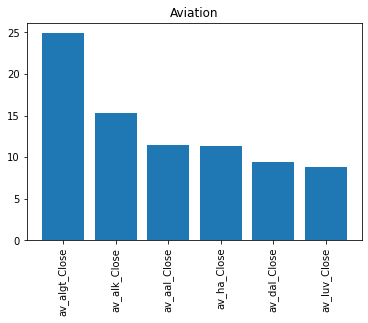

In [85]:
# Plotting risk of every stock of Aviation industry

plt.xticks(rotation=90)
plt.title("Aviation")
plt.bar(data=risk_aviation,height='Risk',x=risk_aviation.index)


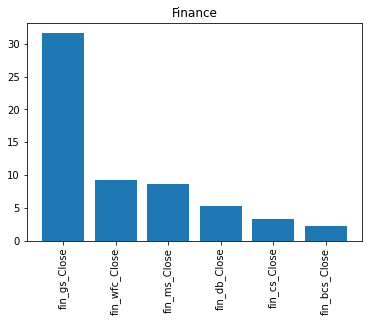

In [86]:
# Plotting risk of every stock of Finance industry

plt.xticks(rotation=90)
plt.title("Finance")
plt.bar(data=risk_finance,height='Risk',x=risk_finance.index)


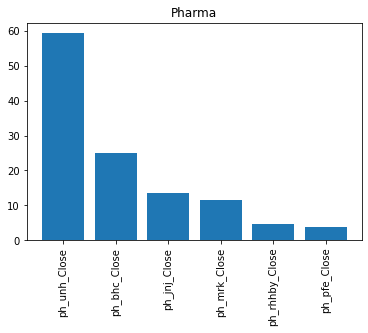

In [87]:
# Plotting risk of every stock of Pharma industry

plt.xticks(rotation=90)
plt.title("Pharma")
plt.bar(data=risk_pharma,height='Risk',x=risk_pharma.index)


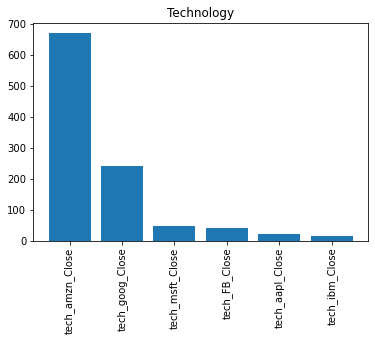

In [88]:
# Plotting risk of every stock of Technology industry

plt.xticks(rotation=90)
plt.title("Technology")
plt.bar(data=risk_technology,height='Risk',x=risk_technology.index)


In [48]:
# Risk of just pharma and technology industry

risk_pharma_tech=data_std[data_std.index.isin([ 'ph_bhc_Close', 'ph_jnj_Close', 'ph_mrk_Close',
       'ph_pfe_Close', 'ph_rhhby_Close', 'ph_unh_Close', 'tech_aapl_Close',
       'tech_amzn_Close', 'tech_FB_Close', 'tech_goog_Close', 'tech_ibm_Close',
       'tech_msft_Close'])]
risk_pharma_tech

,Risk
tech_amzn_Close,668.094905
tech_goog_Close,241.504770
ph_unh_Close,59.405895
tech_msft_Close,45.740242
tech_FB_Close,40.029860
ph_bhc_Close,24.984640
tech_aapl_Close,20.984674
tech_ibm_Close,15.157854
ph_jnj_Close,13.649297
ph_mrk_Close,11.546361


In [49]:
# Creating empty dictionary to store risk of every industry

risk_industry={'Industry':[],'Risk':[]}

In [50]:
# Appending Industry and there respective risk to the dictionary

risk_industry['Industry'].append('Aviation')
risk_industry['Risk'].append(risk_aviation.mean()[0])
risk_industry['Industry'].append('Finance')
risk_industry['Risk'].append(risk_finance.mean()[0])
risk_industry['Industry'].append('Pharma')
risk_industry['Risk'].append(risk_pharma.mean()[0])
risk_industry['Industry'].append('Technology')
risk_industry['Risk'].append(risk_technology.mean()[0])

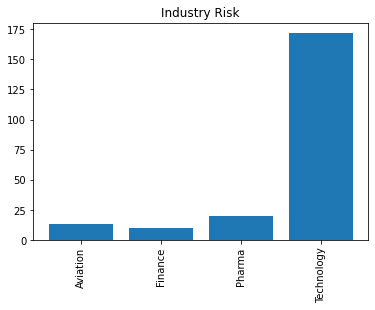

In [89]:
# Plotting risk associated with every industry

plt.xticks(rotation=90)
plt.title("Industry Risk")
plt.bar(data=risk_industry,height='Risk',x='Industry')


### 5. Correlation among stocks

In [52]:
# Creating 4 dataframe to store return of stocks of each industry

av_corr=stocks_returns[['av_aal_Close', 'av_algt_Close', 'av_alk_Close','av_dal_Close', 'av_ha_Close', 'av_luv_Close']]
fin_corr=stocks_returns[['fin_bcs_Close','fin_cs_Close', 'fin_db_Close', 'fin_gs_Close', 'fin_ms_Close',
                         'fin_wfc_Close']]
ph_corr=stocks_returns[['ph_bhc_Close', 'ph_jnj_Close', 'ph_mrk_Close','ph_pfe_Close', 'ph_rhhby_Close', 
                        'ph_unh_Close']]
tech_corr=stocks_returns[['tech_aapl_Close','tech_amzn_Close', 'tech_FB_Close', 'tech_goog_Close', 'tech_ibm_Close',
                          'tech_msft_Close']]

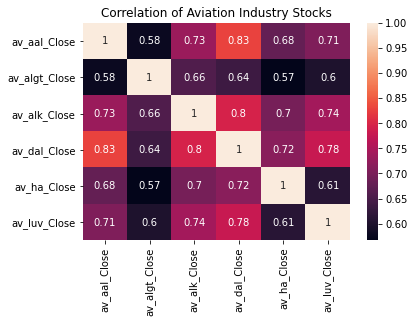

In [90]:
# Correlation of stocks of Aviation industry

plt.title('Correlation of Aviation Industry Stocks')
sns.heatmap(av_corr.corr(),annot=True)


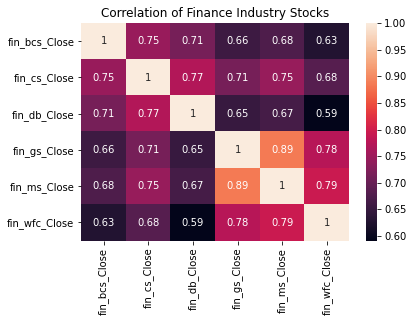

In [91]:
# Correlation of stocks of Finance industry

plt.title('Correlation of Finance Industry Stocks')
sns.heatmap(fin_corr.corr(),annot=True)


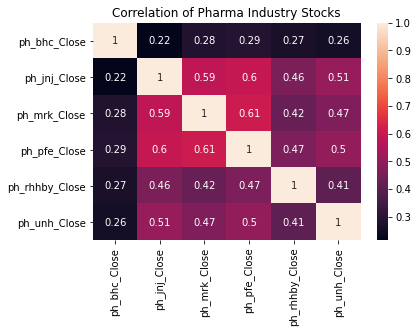

In [92]:
# Correlation of stocks of Pharma industry

plt.title('Correlation of Pharma Industry Stocks')
sns.heatmap(ph_corr.corr(),annot=True)


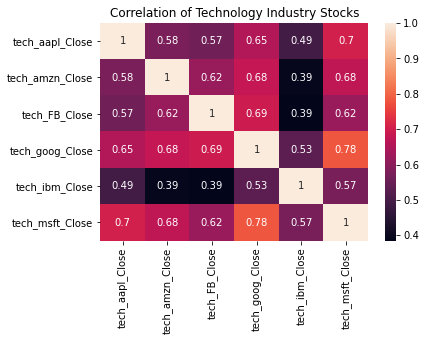

In [93]:
# Correlation of stocks of Technology industry

plt.title('Correlation of Technology Industry Stocks')
sns.heatmap(tech_corr.corr(),annot=True)


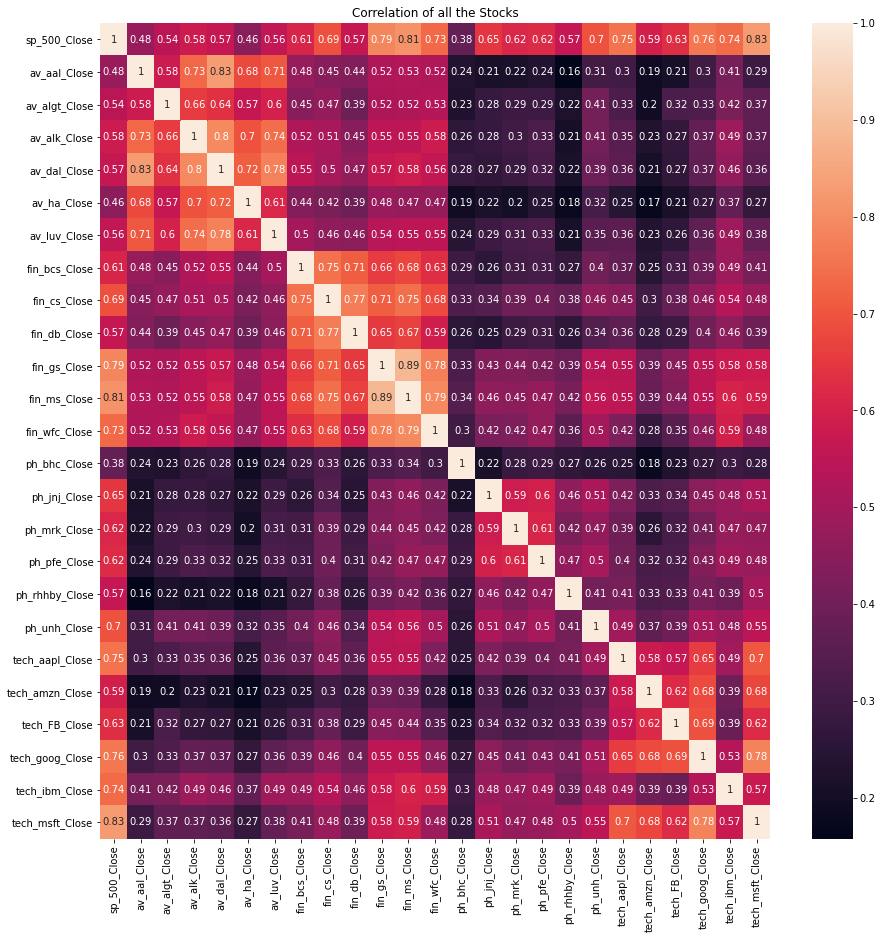

In [94]:
# Correlation of all the stocks

plt.figure(figsize=[15,15])
plt.title('Correlation of all the Stocks')
sns.heatmap(stocks_returns.corr(),annot=True)


### 6. Calculating average daily return (CAGR)

In [58]:
# Empty dictionary to store average daily return of all the stocks

adr={'Stocks':[],'Avg_daily_return':[]}

In [59]:
# Calculating average daily return

for i in data.columns:
    adr['Stocks'].append(i)
    c1=data[data.index=='2015-10-01'][i][0]
    c2=data[data.index=='2020-09-30'][i][0]
    f=((c2/c1)**(1/1260))-1
    adr['Avg_daily_return'].append(f)

In [60]:
# Converting it into dataframe

adr=pd.DataFrame(adr)
adr

,Stocks,Avg_daily_return
0,sp_500_Close,0.000443
1,av_aal_Close,-0.000920
2,av_algt_Close,-0.000475
3,av_alk_Close,-0.000622
4,av_dal_Close,-0.000314
5,av_ha_Close,-0.000517
6,av_luv_Close,-0.000019
7,fin_bcs_Close,-0.000870
8,fin_cs_Close,-0.000700
9,fin_db_Close,-0.000912


Inferences-
- This is the average daily return which is used to project future portfolio value